In [12]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt

In [13]:
train_dir = './train'
test_dir = './test'

In [14]:
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    shear_range=0.2,    # Rango de corte aleatorio
    zoom_range=0.2,     # Rango de zoom aleatorio
    horizontal_flip=True # Volteo horizontal aleatorio
)

test_datagen = ImageDataGenerator(rescale=1.0/255.0)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(64, 64),  # Tamaño al que se redimensionarán las imágenes
    batch_size=32,
    class_mode='binary'
)

Found 11879 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [15]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [16]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [17]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 20)             │       250,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 20)             │           420 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 270,733 (1.03 MB)

 Trainable params: 270,733 (1.03 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
# Ajustar el modelo
history = model.fit(
    train_generator,                    # Generador de datos de entrenamiento
    steps_per_epoch=len(train_generator), # Número de batches por época (opcionalmente podrías definirlo manualmente)
    epochs=10,                          # Número de épocas de entrenamiento
    validation_data=test_generator,     # Generador de datos de validación
    validation_steps=len(test_generator) # Número de batches de validación por época
)


c:\Users\mglez\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
372/372 ━━━━━━━━━━━━━━━━━━━━ 78s 193ms/step - accuracy: 0.7169 - loss: 0.5174 - val_accuracy: 0.8415 - val_loss: 0.3644
Epoch 2/10
372/372 ━━━━━━━━━━━━━━━━━━━━ 0s 252us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/10


c:\Users\mglez\AppData\Local\Programs\Python\Python311\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


372/372 ━━━━━━━━━━━━━━━━━━━━ 79s 186ms/step - accuracy: 0.8361 - loss: 0.3783 - val_accuracy: 0.8275 - val_loss: 0.3799
Epoch 4/10
372/372 ━━━━━━━━━━━━━━━━━━━━ 0s 112us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/10
372/372 ━━━━━━━━━━━━━━━━━━━━ 72s 195ms/step - accuracy: 0.8505 - loss: 0.3402 - val_accuracy: 0.8515 - val_loss: 0.3367
Epoch 6/10
372/372 ━━━━━━━━━━━━━━━━━━━━ 0s 101us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/10
372/372 ━━━━━━━━━━━━━━━━━━━━ 82s 220ms/step - accuracy: 0.8498 - loss: 0.3415 - val_accuracy: 0.8960 - val_loss: 0.3024
Epoch 8/10
372/372 ━━━━━━━━━━━━━━━━━━━━ 0s 112us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 9/10
372/372 ━━━━━━━━━━━━━━━━━━━━ 88s 237ms/step - accuracy: 0.8471 - loss: 0.3364 - val_accuracy: 0.8820 - val_loss: 0.2884
Epoch 10/10
372/372 ━━━━━━━━━━━━━━━━━━━━ 0s 68us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00


In [19]:
# Guardar el modelo completo
model.save('models/tercer_cnn.h5')

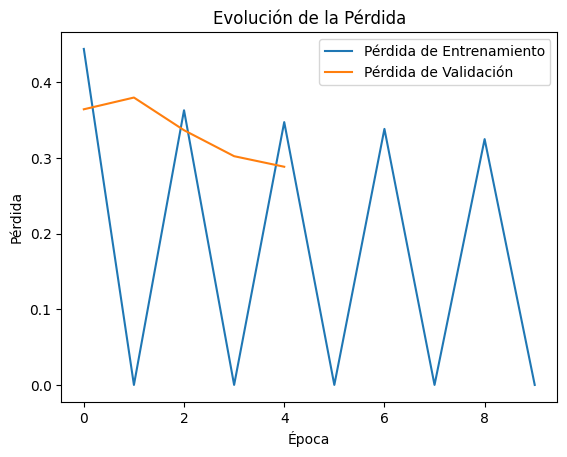

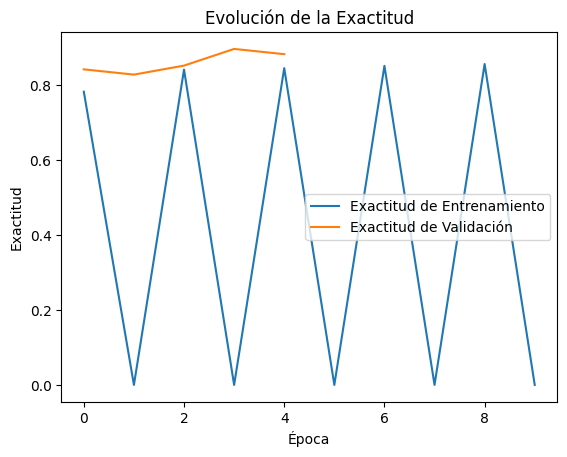

In [20]:
# Graficar la pérdida
plt.plot(history.history['loss'], label='Pérdida de Entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de Validación')
plt.title('Evolución de la Pérdida')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

# Graficar la exactitud
plt.plot(history.history['accuracy'], label='Exactitud de Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Exactitud de Validación')
plt.title('Evolución de la Exactitud')
plt.xlabel('Época')
plt.ylabel('Exactitud')
plt.legend()
plt.show()

In [30]:
from IPython.display import display, HTML

html_content = """
<!DOCTYPE html>
<html lang="es">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Gráficas</title>
</head>
<body>
    <p>Esto no es exactamente lo que buscamos, ya que la gráfica que estamos buscando se parece más a esta:</p>
    <img src="img/perdida.png" alt="Gráfica Correcta" width="250">
    <img src="img/bien_entrenado.png" alt="Gráfica Correcta" width="250">
</body>
</html>
"""

# Mostrar el contenido HTML en el notebook
display(HTML(html_content))

Crearemos un nuevo modelo con menos capas para ver que resultado obtenemos

In [21]:
# Mostrar precision y perdida del modelo
loss, acc = model.evaluate(test_generator)
print(f'Pérdida: {loss}')
print(f'Exactitud: {acc}')

63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 83ms/step - accuracy: 0.8800 - loss: 0.2924
Pérdida: 0.2884137034416199
Exactitud: 0.8820000290870667
